### 資料集格式
#### Students’ Adaptability Level in school, college and university
. About this file:  Students’ Adaptability Level in school, college and university  
. Gender: Gender type of student  
. Age: Age range of the student  
. Education Level: Education institution level  
. Institution Type: Education institution type  
. IT Student: Studying as IT student or not  
. Location in Town: Is student location in town  
. Load-shedding: Level of load shedding  
. Financial Condition: Financial condition of family  
. Internet Type: Internet type used mostly in device  
. Network Type: Network connectivity type  
. Class Duration: Daily class duration  
. Self LMS: Institution’s own LMS availability  
. Device: Device used mostly in class  
. Adaptability Level: Adaptability level of the student  

In [1]:
import typing 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import plotly.express as px
from sklearn import tree
import random
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
# 檔案路徑
target_file: str = "students_adaptability_level_online_education.csv"
target_folder: str = "./dataset/"
target_path: str = f"{target_folder}{target_file}"


In [3]:
# 將 dataset 讀入 dataframe
df: pd.DataFrame = pd.read_csv(target_path)
df.head(3)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate


## 112524008 李庭妘

#### 比較不同的設備和網路類型的組合，對於學習適應性的影響。
#### Analyzing the Impact of Different Device and Network Type Combinations on Learning Adaptivity.

In [4]:
# Selecting the required columns
data: pd.DataFrame = df[['Device','Network Type','Adaptivity Level']]

In [5]:
# Creating a new feature by combining Device and Network Type
data['Combination'] = data['Device'] + '_' + data['Network Type']

/var/folders/rj/m4tzzx_90vs9t2hqml7sb5tr0000gn/T/ipykernel_96373/1792015939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Combination'] = data['Device'] + '_' + data['Network Type']


#### Assessing the Relationship between Device and Network Type Combinations and Learning Adaptivity

In [6]:
# Chi-Square Test
cross_table: pd.DataFrame = pd.crosstab(data['Combination'], data['Adaptivity Level'])
chi2, p, _, _ = chi2_contingency(cross_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 97.67071542755623
P-value: 1.5900052161047244e-15


In [7]:
# Cramer's V
n : int = cross_table.sum().sum()
cramer_v = (chi2 / n) ** 0.5
print(f"Cramer's V: {cramer_v}")

Cramer's V: 0.2847007826201537


1. Chi-Square Statistic: 97.67071542755623

    The Chi-Square Statistic value is used to evaluate the relationship between "Combination" and "Adaptivity Level," indicating whether different combinations of devices and network types significantly impact learning adaptivity. A larger Chi-Square Statistic suggests a stronger relationship.

2. P-value: 1.5900052161047244e-15

    The P-value is an indicator used to assess the significance of the Chi-Square Statistic value. Since the P-value is very close to zero, it implies that this relationship is statistically significant and unlikely to be due to random chance.

3. Cramer's V: 0.2847007826201537

    Cramer's V is a statistic that measures the relationship between "Combination" and "Adaptivity Level" on a scale between 0 and 1, with values closer to 1 indicating a stronger relationship.

In summary, the results suggest that different combinations of devices and network types have a statistically significant impact on learning adaptivity, although the strength of the correlation is relatively weak.

### Evaluate which combination can achieve the best learning adaptability.

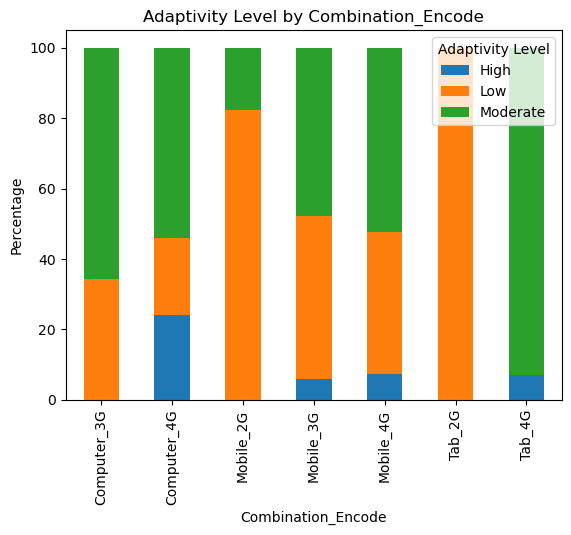

In [8]:
# Calculating the percentage of Adaptivity Level in each combination
cross_table_percent = cross_table.div(cross_table.sum(1), axis=0) * 100

# Stacked bar chart
cross_table_percent.plot(kind='bar', stacked=True)
plt.xlabel('Combination_Encode')
plt.ylabel('Percentage')
plt.title('Adaptivity Level by Combination_Encode')
plt.legend(title='Adaptivity Level')
plt.show()

In [9]:
# Adaptivity Score
# Converting Adaptivity Level to a numerical format
data['AdaptivityLevel_Encode'] = data['Adaptivity Level'].map({'Low': 1, 'Moderate': 2, 'High': 3})

/var/folders/rj/m4tzzx_90vs9t2hqml7sb5tr0000gn/T/ipykernel_96373/2113092477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AdaptivityLevel_Encode'] = data['Adaptivity Level'].map({'Low': 1, 'Moderate': 2, 'High': 3})


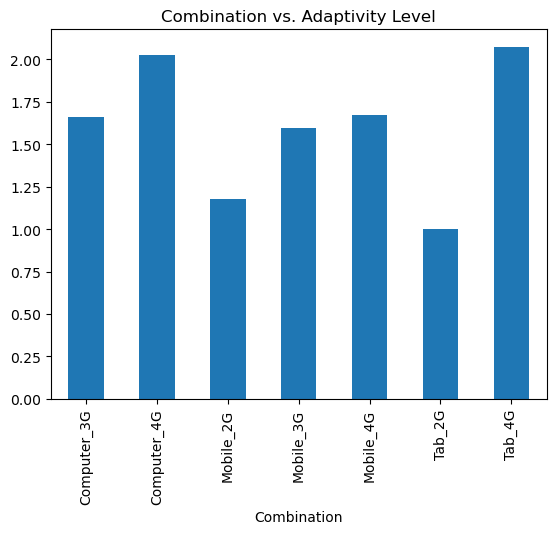

In [10]:
# Bar chart of the mean AdaptivityLevel for each combination
data.groupby('Combination')['AdaptivityLevel_Encode'].mean().plot(kind='bar', title='Combination vs. Adaptivity Level')
plt.show()

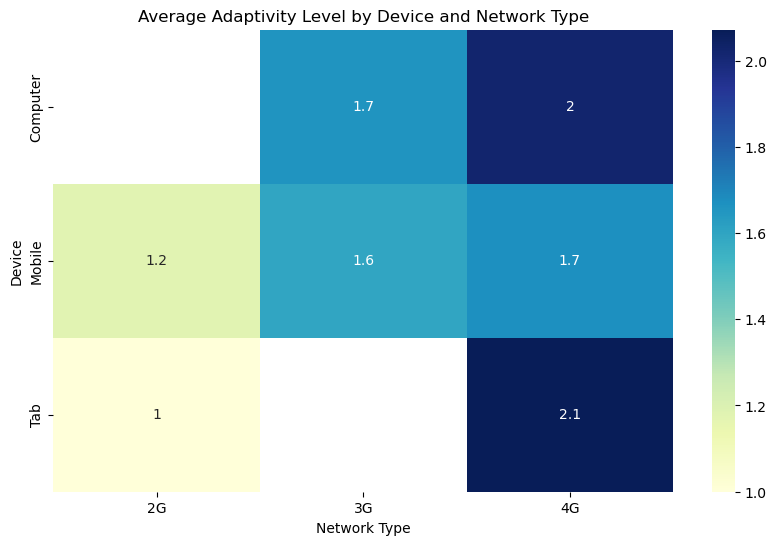

In [11]:
# Heatmap of the average Adaptivity Level by Device and Network Type

grouped_data = data.groupby(['Device', 'Network Type'])['AdaptivityLevel_Encode'].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data.unstack(), annot=True, cmap='YlGnBu')
plt.title('Average Adaptivity Level by Device and Network Type')
plt.xlabel('Network Type')
plt.ylabel('Device')

plt.show()

In [12]:
average_adaptivity_levels: pd.core.series.Series = data.groupby('Combination')['AdaptivityLevel_Encode'].mean()
top_combinations: pd.core.series.Series = average_adaptivity_levels.nlargest(3)

print('Top 3 combinations for Adaptivity Level:')
for combination, mean_value in top_combinations.items():
    print(f'Combination: {combination}, Mean Value: {mean_value}')

Top 3 combinations for Adaptivity Level:
Combination: Tab_4G, Mean Value: 2.0714285714285716
Combination: Computer_4G, Mean Value: 2.024193548387097
Combination: Mobile_4G, Mean Value: 1.6709470304975922


### Conclusion
First, it can be concluded that, Network Type 4G results in higher average learning adaptivity in general.

Educators can consider supporting or encouraging students to learn in a 4G environment, or educators can compress the data content of learning materials to reduce the network speed requirements.

Second, it can be observed that among all combinations, the combination of 4G+Tab results in the highest adaptability average.

Therefore, it may be worth optimizing the design of learning materials to ensure they can run smoothly on tablets.

## 112524012 黃品瑄  
---
### 進行學生的財務狀況與教育水平的關聯性分析
#### (Analyze how a student's financial situation impacts their level of education.)

- Education Level (教育水平)
- Financial Condition (財務狀況)

>- 我的預期效果: 可能會顯示出家庭經濟狀況對學生教育機會的影響程度。  
>>- (My Expected effect: This study may reveal how a family's economic status impacts a student's educational opportunities.)
---


---
>### 步驟一：資料準備與清理  
>> 1. 檢查資料集，確保其中包含了教育程度和年齡這兩個欄位。  
>> 2. 使用程式碼將資料集載入到環境中，例如使用 Python 的 pandas 庫。  
>### Step 1: Data Preparation and Cleaning
>> 1. Check that the dataset has the education and age fields.  
>> 2. Then load it into the environment with code, like Pandas in Python.
---

In [13]:
# 檢查列名稱
# Check column names
print(df.columns)

# 檢查缺失值
# Check for missing values
print(df.isnull().sum())

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


---
>### 步驟二 - 1 ：成人人數統計 
>> 首先，選擇年齡大於或等於18歲的樣本。  

>Adult population statistics
>>First, Select samples 18 years or older.
---

In [14]:
# 處理年齡區間資料，將其轉換為數值
# Process age interval data and convert it into numerical values
def age_range_to_value(age_range):
    if '-' in age_range:  # 檢查年齡區間是否包含連字符 "-"
        split_age = age_range.split('-')  # 分割年齡區間
        return (int(split_age[0]) + int(split_age[1])) // 2  # 計算年齡區間的中間值
    else:
        return int(age_range)  # 若不是區間，直接轉換為數值

# 使用處理後的函數處理年齡資料
# Use function to process age data.
df['Age'] = df['Age'].apply(age_range_to_value)  # 應用處理年齡區間的函數

# 將年齡分組 group age
bins = [0, 12, 15, 18]  # 分組邊界
labels = ['Children', 'Teenagers', 'Adults']  # 標籤名稱
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)  # 將年齡分組並標記類別

# 選擇年齡大於或等於18歲的樣本
# Select samples older than or equal to 18 years old
df_adults = df[df['Age'] >= 18]  # 選擇符合條件的樣本

print(f"Number of samples in df_adults: {df_adults.shape[0]}")  # 輸出符合條件的樣本數量


Number of samples in df_adults: 720


---
>### 步驟二 - 2 成人教育程度與經濟狀況統計 ('Financial Condition'=['Poor','Mid','Rich'])
>>1. 選擇年齡大於或等於18歲的樣本。
>>2. 使用 pd.crosstab 函數計算不同教育程度和經濟狀況的交叉分析。
>>3. 使用堆疊條形圖顯示結果。
>### Step 2-2 Adult Educational Attainment and Economic Status Statistics ('Financial Status'=['Poor','Mid','Rich']) 
>>1. Choose samples 18 years or older.
>>2. Use the pd.crosstab function to calculate cross-analysis across education and economic status.
>>3. Show the results with a stacked bar chart.
---

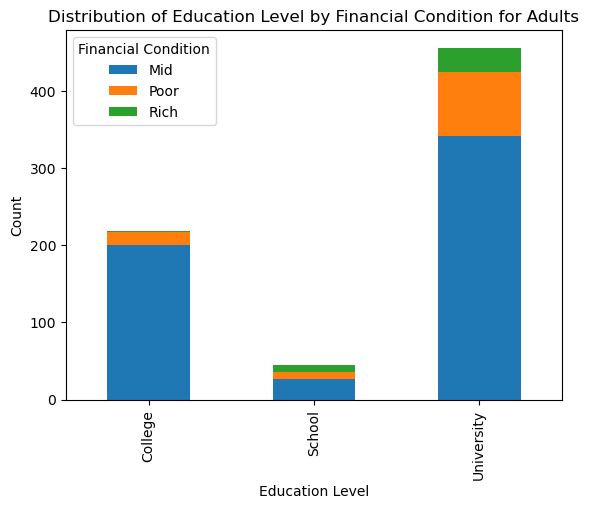

In [15]:
# # 選擇年齡大於或等於18歲的樣本
# # Select samples older than or equal to 18 years old
# df_adults

# 使用 pd.crosstab 函數計算不同教育程度和經濟狀況的交叉分析 
# Use the pd.crosstab method to generate a cross-analysis between education and economic status.
cross_table_fc = pd.crosstab(df_adults['Education Level'], df_adults['Financial Condition'])

# 繪製堆疊條形圖 Draw a stacked bar chart.
cross_table_fc.plot(kind='bar', stacked=True)

# 設置標籤 Set label
plt.xlabel('Education Level')
plt.ylabel('Count')
# 依成人經濟狀況劃分的教育程度分佈
plt.title('Distribution of Education Level by Financial Condition for Adults')
plt.show()

In [16]:
# 使用 groupby 和 sum 計算數據
# Calculate data using groupby and sum
new_table = df_adults.groupby('Education Level')['Financial Condition'].value_counts().unstack().fillna(0)

# 添加合計列
# Add total column
new_table['Total'] = new_table.sum(axis=1)

# 添加合計行
# Add total row
new_table.loc['Total'] = new_table.sum()

# 將表格重新排序
# Reorder table
new_table = new_table.reindex(index=['School', 'College', 'University', 'Total'], 
                            columns=['Poor', 'Mid', 'Rich', 'Total'])

# 顯示新的表格
# Show new table
print(new_table)


Financial Condition  Poor  Mid  Rich  Total
Education Level                            
School                  9   27     9     45
College                17  200     2    219
University             82  342    32    456
Total                 108  569    43    720


---
### 根據熱力圖的顯示，我們可以得出一些初步結論(初步觀察)：
>就「Financial Condition」（財務狀況）而言，在不同的「Education Level」（教育水平）中。
>>1. 大學（University）的人數最多，其次是大專院校（College），最少的是中小學校（School）。
>>2. 在「Education Level」方面，教育水平為大學（University）的受訪者數量最多，其次是大專院校（College），最少的是中小學校（School）。
>>3. 就「Financial Condition」而言，中等（Mid）財務狀況的人數最多，其次是困難（Poor）和豐裕（Rich）的人數。

>數據差異：
>>1. 在"University" 教育階段中(相較於"School" 和 "College" 階段)，有較多的人處於"Mid"和"Rich"的經濟狀況。　
>>2. 在"College" 教育階段中，"Mid"經濟狀況的人數遠多於"Rich"和"Poor"的人數。

### Based on the heat map, we can draw some preliminary conclusions (initial observations):
>>In terms of "Financial Condition", among different "Education Levels".  
>>1. University (大學) has the largest number of students, followed by College (大專院校) and the least number of students are in primary and secondary schools (中小學校).  
>>2. In terms of "Education Level", the number of respondents whose education level is University is the highest, followed by College, and the least is School.  
>>3. For 'Financial Condition', the highest number of respondents were in the Medium financial condition, followed by those in the Difficult (Poor) and Rich (Rich) categories.  

>Difference in data:
>>1. At the "University" level of education (compared to the "School" and "College" levels), more people were in the "Mid" and "Rich" financial situations.　 
>>2. In the "College" stage of education, the number of people in the "Mid" economic status is much larger than the number of people in the "Rich" and "Poor" status.  
---

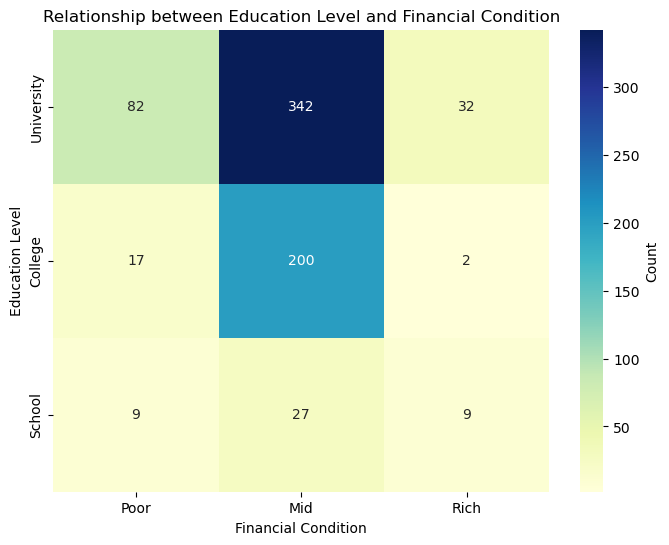

In [17]:
# 選擇年齡大於或等於18歲的樣本
# Selection of samples older than or equal to 18 years of age
df_adults = df[df['Age'] >= 18]

# 創建交叉表
# Create crosstabs
cross_table = pd.crosstab(pd.Categorical(df_adults['Education Level'], categories=['University','College','School'], ordered=True), 
                        pd.Categorical(df_adults['Financial Condition'], categories=['Poor', 'Mid', 'Rich'], ordered=True))

# 重命名行和列索引
# Rename row and column indexes
cross_table = cross_table.rename(index={'University': 'University','College': 'College','School': 'School' }, 
                                columns={'Poor': 'Poor', 'Mid': 'Mid', 'Rich': 'Rich'})

# 使用seaborn和matplotlib繪製熱力圖
# Plotting heat maps with seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'}, cbar=True)
plt.xlabel('Financial Condition')
plt.ylabel('Education Level')
plt.title('Relationship between Education Level and Financial Condition')
plt.show()

1. 曾嘗試使用，ANOVA F-Statistic，數據並未提供足夠的證據支持教育水平與經濟狀況之間存在顯著關聯性的觀點。  
2. 數據結果:ANOVA F-Statistic: 1.9175872211290341；P-value: 0.14771405611151966。  
#### English version
1. An attempt was made to use, ANOVA F-Statistic, the data did not provide enough evidence to support the view that there is a significant correlation between education level and economic status.  
2. Data result: ANOVA F-Statistic: 1.9175872211290341; P-value: 0.14771405611151966.

In [18]:
# from scipy.stats import f_oneway

# # 選擇年齡大於或等於18歲的樣本
# df_adults = df[df['Age'] >= 18]

# # 將類別映射到數值
# education_mapping = {'School': 1, 'College': 2, 'University': 3}
# df_adults['Education_Level_Numeric'] = df_adults['Education Level'].map(education_mapping)

# # 將類別映射到數值
# financial_mapping = {'Poor': 1, 'Mid': 2, 'Rich': 3}
# df_adults['Financial_Condition_Numeric'] = df_adults['Financial Condition'].map(financial_mapping)

# # 進行分析
# f_statistic, p_value = f_oneway(df_adults[df_adults['Financial Condition'] == 'Poor']['Education_Level_Numeric'],
#                                 df_adults[df_adults['Financial Condition'] == 'Mid']['Education_Level_Numeric'],
#                                 df_adults[df_adults['Financial Condition'] == 'Rich']['Education_Level_Numeric'])

# print(f"ANOVA F-Statistic: {f_statistic}")
# print(f"P-value: {p_value}")


1. Kruskal-Wallis H統計量是一種非參數統計檢定方法:提供了強有力的證據，支持教育水平與經濟狀況之間的非線性關聯。  
2. Kruskal-Wallis H-statistic的較高值以及顯著性水平P-value的極低值（遠小於0.05）表明數據提供了足夠的證據，支持教育水平與經濟狀況之間存在顯著的非線性關聯。這表明這些數據組之間的差異不太可能是由於隨機因素引起的，而可能是由於真正的關聯性。  
3. 數據結果:Kruskal-Wallis H-statistic: 18.072002851220077;P-value: 0.00011904589991971843  

#### English version
1. The Kruskal-Wallis H-statistic is a non-parametric statistical validation method: it provides strong evidence in favor of a non-linear association between educational attainment and economic status.  
2. The high values of the Kruskal-Wallis H-statistic and the very low values of the significance level P-value (much less than 0.05) indicate that the data provide sufficient evidence to support the existence of a significant non-linear association between educational attainment and economic status. This suggests that the differences between these datasets are unlikely to be due to random factors but may be due to genuine correlations.  
3. Data Results:Kruskal-Wallis H-statistic: 18.072002851220077;P-value: 0.00011904589991971843


In [19]:
# from scipy.stats import kruskal

# # 選擇大於或等於18歲的樣本
# df_adults = df[df['Age'] >= 18]

# # 將不同財務狀況的教育程度分組
# group1 = df_adults[df_adults['Financial Condition'] == 'Poor']['Education Level']
# group2 = df_adults[df_adults['Financial Condition'] == 'Mid']['Education Level']
# group3 = df_adults[df_adults['Financial Condition'] == 'Rich']['Education Level']

# # 進行Kruskal-Wallis檢定
# H, p_value = kruskal(group1, group2, group3)

# # 輸出結果
# print(f"Kruskal-Wallis H-statistic: {H}")
# print(f"P-value: {p_value}")


---
>### 步驟三：成人的財務狀況與成人的教育程度關聯性分析-卡方
>>1. 選擇年齡大於或等於18歲的樣本。
>>2. 使用相應的程式碼計算該樣本中不同教育程度的分佈情況以及不同財務狀況的分佈情況。
>>3. 使用統計方法（如卡方檢定或相關係數）來評估教育程度和財務狀況之間的關聯性。
>>4. 解讀分析結果的報告或總結。
>### Step 3: Analyzing the Relationship between Adults' Finances and Education Level using Chi-Square Test
>>1. Select samples whose age is greater than or equal to 18 years old.
>>2. Calculate the distribution of educational levels and financial statuses in the sample using the appropriate code.
>>3. Use statistical methods like chi-square tests or correlation coefficients to assess the link between educational achievement and economic status.
>>4. Interpret analysis reports or summaries.  
---

### 卡方檢定-獨立性檢定(Chi-square檢驗)的結果顯示了教育水平和經濟狀況"存在關聯性"。
- 數據結果:Chi-square Statistic: 43.33578659824871;P-value: 8.813829914215358e-09  
>具體來說，根據所提供的卡方統計量和P-value，我們可以得出以下結論：
>>1. 統計顯著性： 極低的P-value（8.813829914215358e-09，非常接近於零）表明觀察到的數據之間存在著顯著的關聯性。這表示教育水平和經濟狀況之間的差異不太可能是由於隨機因素引起的。
>>2. 卡方統計量： 高卡方統計量的值（43.33578659824871）表明觀察到的數據與期望之間存在著較大的差異。這表明數據中的變異程度很大，並且數據之間存在著明顯的相關性。
>>3. 因此，根據這些結果，我們可以得出結論，教育水平和經濟狀況之間存在著關聯性。這意味著這兩個變量之間的差異不太可能是由於隨機因素引起的。這些結果強有力地證明了教育水平和經濟狀況之間的關聯性，並表明這種關聯性不太可能是由於偶然性因素所致。

>為何使用卡方檢定-獨立性檢定(Chi-square檢驗)  
>>1. 常用於分析兩個類別變數之間是否存在相關性或相互獨立的關係。  
>>2. 確認這兩個變數之間是否存在相關性或者是它們之間是否獨立，確認教育水平和經濟狀況之間的關聯性。

#### English version
### The results of the Chi-square test show that there is a "correlation" between educational level and economic status.
- Data result: Chi-square Statistic: 43.33578659824871;P-value: 8.813829914215358e-09  
>>Specifically, based on the provided Chi-square statistic and P-value, we can draw the following conclusions:
>>1. Statistical significance: The very low P-value (8.813829914215358e-09, which is very close to zero) indicates that there is a significant correlation between the observed data. This means that it is unlikely that the difference between education level and economic status is due to random factors.
>>2. chi-square statistic: The value of high chi-square statistic (43.33578659824871) indicates that there is a significant difference between the observed data and the expectation. This indicates that there is a high degree of variability in the data and there is a significant correlation between the data.
>>3. Therefore, based on these results, we can conclude that there is a correlation between the level of education and economic status. This means that the difference between the two variables is unlikely to be due to random factors. These results provide strong evidence of the correlation between education level and economic status and suggest that this correlation is unlikely to be due to chance factors.  

>Why use chi-square test - Independence test (Chi-square test)?  
>>1. Commonly used to analyze whether there is a correlation or independent relationship between two categories of variables.  
>>2. To confirm whether there is correlation between two variables or whether they are independent of each other, and to confirm the correlation between education level and economic status.



In [20]:
# 執行卡方檢定
# Perform a chi-square test
contingency_table = pd.crosstab(df_adults['Education Level'], df_adults['Financial Condition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 輸出結果
# Output results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-square Statistic: 43.33578659824871
P-value: 8.813829914215358e-09


---
### 其他分析方式 Other ways of analyzing

---
### Cramer's V：＂存在一些程度的關聯性＂，但不能完全確定它們之間有明顯的相關性。
- 數據結果: Cramer's V值為0.165  
>是一種用於衡量分類變數之間相關性強度的統計量。
>>它的值範圍通常在0和1之間，數值越接近1表示相關性越強，而數值越接近0則表示相關性越弱。  
>>0.165表示教育水平和經濟狀況之間存在一些程度的關聯性，但不能完全確定它們之間有明顯的相關性。  

>為何使用
>>1. 試圖分析教育水平與經濟狀況之間的關聯性。  
>>2. Cramer's V value是用來衡量教育水平和經濟狀況之間關聯程度的指標。  
>>3. 這個檢驗有助於判斷這兩個因素之間的關聯是否具有統計學意義。  

#### English version
### Cramer's V: "Some degree of correlation exists", but it is not entirely certain that there is a significant correlation between them.
- Data result: Cramer's V is 0.165  
>Cramer's V is a statistic used to measure the strength of correlation between categorical variables.
>>It usually ranges between 0 and 1, with values closer to 1 indicating a stronger correlation and values closer to 0 indicating a weaker correlation.  
>>0.165 indicates that there is some degree of correlation between education level and economic status, but it is not entirely certain that there is significant correlation between them.  

>Why use
>>1. To try to analyze the correlation between education level and economic status.  
>>Cramer's V value is a measure of the degree of correlation between educational attainment and economic status.  
>>3. This test helps to determine whether the association between these two factors is statistically significant.
---

In [21]:
# 選擇大於等於18歲的樣本
# Select samples older than or equal to 18 years old
df_adults = df[df['Age'] >= 18]

# 計算Cramer's V 檢定
# Calculate Cramer's V test
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]      # 計算卡方值 (Calculate chi-square value)
    n = confusion_matrix.sum().sum()      # 計算總數 (Calculate the total)
    phi2 = chi2/n      # 計算 phi2 值 (Calculate phi2 value)
    r, k = confusion_matrix.shape      # 獲取列和行的數量 (Get the number of columns and rows)
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))     # 調整 phi2 值 (Adjust phi2 value)
    rcorr = r - ((r-1)**2)/(n-1)      # 調整列數 (Adjust the number of columns)
    kcorr = k - ((k-1)**2)/(n-1)      # 調整行數 (Adjust the number of rows)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))      # 返回 Cramer's V 值 (Returns Cramer's V value)

# 製作列聯表
# Create a contingency table
contingency_table = pd.crosstab(df_adults['Education Level'], df_adults['Financial Condition'])

# 計算 Cramer's V 並輸出結果
# Calculate Cramer's V and print the result
cramers_v_value = cramers_v(contingency_table.values)
print(f"Cramer's V value: {cramers_v_value}")


Cramer's V value: 0.16549574317242924


---
### Mann-Whitney U：對於這些數據，教育程度和經濟水平之間"沒有"統計上顯著的差異。
##### ( Mann-Whitney U: For these data, there is "no" statistically significant difference between educational attainment and economic level.)
---

In [22]:
# from scipy.stats import mannwhitneyu

# # 定義教育程度和經濟水平的資料
# education_levels = ['School', 'College', 'University']
# economic_levels = ['Poor', 'Mid', 'Rich']

# # 請插入您的實際數據
# data_school = [9, 27, 9]  # 與 'Poor', 'Mid', 'Rich' 相關的數據
# data_college = [17, 200, 2]  # 與 'Poor', 'Mid', 'Rich' 相關的數據
# data_university = [82, 342, 32]  # 與 'Poor', 'Mid', 'Rich' 相關的數據

# # 執行 Mann-Whitney U 檢定
# u_statistic_school, p_value_school = mannwhitneyu(data_school, data_school, alternative='two-sided')
# u_statistic_college, p_value_college = mannwhitneyu(data_college, data_college, alternative='two-sided')
# u_statistic_university, p_value_university = mannwhitneyu(data_university, data_university, alternative='two-sided')

# # 輸出結果
# print(f"Mann-Whitney U 和 p-value for School: {u_statistic_school}, {p_value_school}")
# print(f"Mann-Whitney U 和 p-value for College: {u_statistic_college}, {p_value_college}")
# print(f"Mann-Whitney U 和 p-value for University: {u_statistic_university}, {p_value_university}")


---
>### Spearman等級相關分析：不同教育水平和經濟狀況之間存在著"一定程度的相關性"
>>1. 對於University 教育程度和經濟狀況之間的相關性，Spearman等級相關係數為0.5。這表明它們之間存在一定程度的正相關，但相關性不是非常強。
>>2. 對於College 教育程度和經濟狀況之間的相關性，Spearman等級相關係數為1.0。這顯示它們之間存在一種比較強的正相關性，這意味著這兩個變量在某種程度上隨著彼此的變化而變化。
>>3. 對於學校教育程度和經濟狀況之間的相關性，Spearman等級相關係數也為1.0，這與學院教育程度和經濟狀況之間的相關性相似。這也顯示了它們之間存在一種較強的正相關性。  

>為何使用
>>Spearman's相關係數評估了教育水平和經濟狀況之間的相關程度，取值介於-1和1之間，越接近1表示兩者之間正相關性越強，而越接近-1表示負相關性越強。

#### English version
>### Spearman's rank correlation analysis: "some degree of correlation" between different levels of education and economic status.
>>1. For the correlation between University educational attainment and economic status, the Spearman level correlation coefficient is 0.5, which indicates that there is a certain degree of positive correlation between them, but the correlation is not very strong.  
>>2. For the correlation between College educational attainment and economic status, the Spearman level correlation coefficient is 1.0, which shows that there is a relatively strong positive correlation between them, which means that these two variables change with each other to some extent.  
>>3. For the correlation between schooling level and economic status, Spearman's rank correlation coefficient is also 1.0, which is similar to the correlation between college education level and economic status. This also shows that there is a strong positive correlation between them.  

>Why use
>>Spearman's correlation coefficient assesses the degree of correlation between education level and economic status, taking values between -1 and 1, with closer to 1 indicating a stronger positive correlation and closer to -1 indicating a stronger negative correlation.
---

In [23]:


# 選擇年齡大於或等於18歲的樣本
# Selection of samples older than or equal to 18 years old
df_adults = df[df['Age'] >= 18]

# 使用 pd.crosstab 函數計算不同教育程度和經濟狀況的交叉分析 
# Using pd.crosstab functions to compute cross-tabulations across educational attainment and economic status
cross_table = pd.crosstab(df_adults['Education Level'], df_adults['Financial Condition'])

# 使用Spearman等級相關分析計算相關係數和p值
# Calculate correlation coefficients and p-values using Spearman's rank correlation analysis
corr, p_value = spearmanr(cross_table)

# 將結果轉換為DataFrame
# Converting results to DataFrame
corr_df = pd.DataFrame(corr, columns=cross_table.columns, index=cross_table.index)
p_value_df = pd.DataFrame(p_value, columns=cross_table.columns, index=cross_table.index)

# 顯示相關係數和p值
# Display correlation coefficients and p-values
print("Spearman's correlation coefficient:")
print(corr_df)
print("\n")
print("P-value:")
print(p_value_df)


Spearman's correlation coefficient:
Financial Condition  Mid  Poor  Rich
Education Level                     
College              1.0   1.0   0.5
School               1.0   1.0   0.5
University           0.5   0.5   1.0


P-value:
Financial Condition       Mid      Poor      Rich
Education Level                                  
College              0.000000  0.000000  0.666667
School               0.000000  0.000000  0.666667
University           0.666667  0.666667  0.000000


--- 
>### 步驟四：撰寫結論報告  
>>1. 根據分析結果撰寫結論報告，描述從數據中觀察到的現象、關聯性和可能的原因。  
>>2. 確保結論是基於數據和統計分析的，並且清晰地傳達給其他人。  
>### Step 4: Write a Conclusion Report  
>>1. Write a report of conclusions based on the results of the analysis, describing observations, correlations, and possible causes from the data.  
>>2. Ensure that the conclusions are based on the data and statistical analysis and are clearly communicated to others.  
---

---
### 目前的數據結果 Current data results
- Number of samples in df_adults: 720  
>成人的教育程度與經濟水準人數
>>|Financial Condition & Education Level  | Poor  |Mid | Rich | Total|         
>>| :-- | :-- | :-- | :-- | :-- |          
>>|School                  |9   |27     |9     |45|
>>|College                |17  |200    | 2    |219|
>>|University             |82  |342    |32    |456|
>>|Total                 |108  |569   | 43    |720|

- Chi-square Statistic: 43.33578659824871;P-value: 8.813829914215358e-09  (教育水平和經濟狀況"存在關聯性")  

- Cramer's V值為0.165 ("存在一些程度的關聯性＂，但不能完全確定它們之間有明顯的相關性。)  

- Spearman等級相關分析：不同教育水平和經濟狀況之間存在著"一定程度的相關性"  
> Spearman's correlation coefficient:  
>> |Financial Condition & Education(Level)|  Mid | Poor | Rich|
>> | :-- | :-- | :-- | :-- |
>> |College|1.0| 1.0| 0.5|
>> |School| 1.0| 1.0 |  0.5|
>> |University| 0.5 |0.5| 1.0|  
---


---
  
### 結論
>1. 從"Financial Condition"（財務狀況）的角度來看，大學（University）的人數最多，其次是大專院校（College），而中小學校（School）的人數最少。  
>2. 在"Education Level"（教育水平）方面，大學（University）的受訪者數量最多，其次是大專院校（College），最少的是中小學校（School）。  
>3. 就"Financial Condition"而言，處於中等（Mid）財務狀況的人數最多，其次是困難（Poor）和豐裕（Rich）的人數。  

>在數據差異方面：
>>1. 在"University"教育階段中，相較於"School"和"College"階段，有較多的人處於"Mid"和"Rich"的經濟狀況。  
>>2. 在"College"教育階段中，"Mid"經濟狀況的人數遠多於"Rich"和"Poor"的人數。  

>根據數據分析結果：
>>1. Chi-square檢驗結果表明教育水平和經濟狀況之間存在著關聯性。P-value的極低值表明這種關聯性具有統計意義，且卡方統計量的高值顯示數據之間存在著較大的差異，這進一步強調了教育水平和經濟狀況之間的關聯性。  
>>2. Cramer's V值的中等程度顯示教育水平和經濟狀況之間存在一些程度的關聯性，但並非十分強烈。  
>>3. 考慮到數據結果，教育水平和經濟狀況之間的關聯性有統計上的支持，並且顯示了一定程度的關聯性，這強調了這兩者之間的相互影響。然而，由於研究中可能存在其他未知因素的影響，因此建議進一步進行更詳細的分析，以全面了解這些變數之間的關係。  建議考慮引入其他可能的影響因素，例如地理位置、家庭背景或職業等，以更全面地評估教育程度和經濟狀況之間的關聯。  
  
---

## 112524023 王傑昇

#### 查看 Education Level、IT Student、Adaptivity Level有哪些值

In [24]:
# 查看 'Education Level' 的不同值
print(df['Education Level'].unique())

# 查看 'IT Student' 的不同值
print(df['IT Student'].unique())

# 查看 'Adaptivity Level' 的不同值
print(df['Adaptivity Level'].unique())

['University' 'College' 'School']
['No' 'Yes']
['Moderate' 'Low' 'High']


In [25]:
# Education Level 
education_mapping = {
    'University': 1,
    'College': 2,
    'School': 3
}
df['Education Level'] = df['Education Level'].map(education_mapping)

# IT Student
it_student_mapping = {
    'Yes': 1,
    'No': 0
}
df['IT Student'] = df['IT Student'].map(it_student_mapping)


# Adaptivity Level
adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}
df['Adaptivity Level'] = df['Adaptivity Level'].map(adaptivity_mapping)

df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Age_Group
0,Boy,23,1,Non Government,0,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2,NaN
1,Girl,23,1,Non Government,0,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2,NaN
2,Girl,18,2,Government,0,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2,Adults
3,Girl,13,3,Non Government,0,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2,Teenagers
4,Girl,18,3,Non Government,0,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,1,Adults


#### 直條圖顯示結果

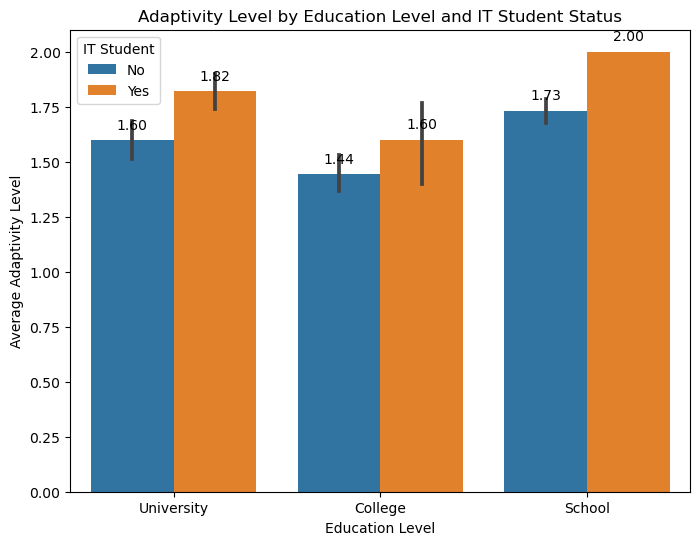

In [26]:
# 將'Education Level'中的1、2、3轉換為University、College、School
education_mapping = {
    1: 'University',
    2: 'College',
    3: 'School'
}
df['Education Level'] = df['Education Level'].map(education_mapping)

# 將'IT Student'中的0和1轉換為'No'和'Yes'
it_student_mapping = {
    0: 'No',
    1: 'Yes'
}
df['IT Student'] = df['IT Student'].map(it_student_mapping)

# 繪製直條圖
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Education Level', y='Adaptivity Level', hue='IT Student', data=df)
plt.title('Adaptivity Level by Education Level and IT Student Status')
plt.xlabel('Education Level')
plt.ylabel('Average Adaptivity Level')

# 在每個直條上標註數字
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}'.format(height), ha='center')

plt.show()

#### 顯示各教育程度的學生總數

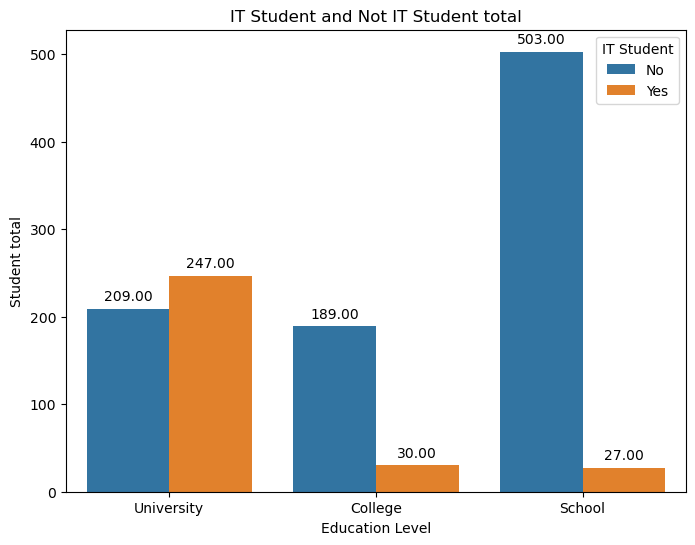

In [27]:
# IT Student 學生和 NOT IT Student 學生的分佈情況
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Education Level', hue='IT Student', data=df)

# 在每個直條圖上顯示學生總數
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center',
                va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('IT Student and Not IT Student total')
plt.xlabel('Education Level')
plt.ylabel('Student total')
plt.show()

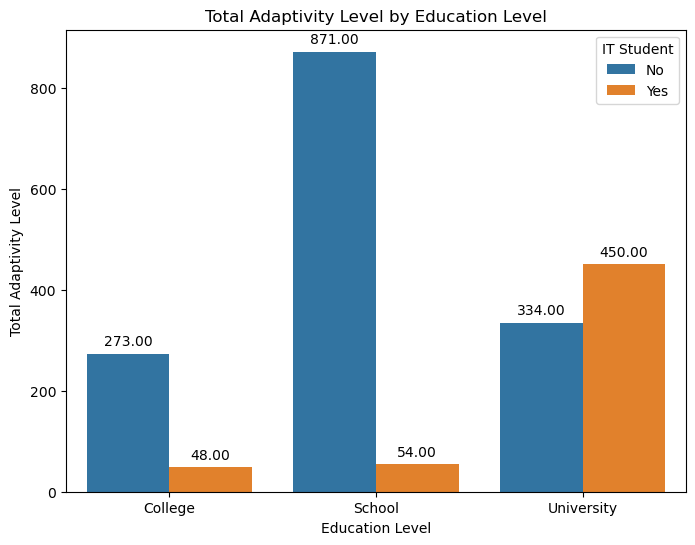

In [28]:
# 計算適應性等級值總和
df['Total Adaptivity Level'] = df['Adaptivity Level']  # 將原始適應性等級映射為數值
adaptivity_sum = df.groupby(['Education Level', 'IT Student'])['Total Adaptivity Level'].sum().reset_index()

# 使用barplot顯示不同教育程度和是否為資訊科技相關專業學生對適應性等級值總和
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Education Level', y='Total Adaptivity Level', hue='IT Student', data=adaptivity_sum)

# 在每個直條圖上標註數值
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center',
                va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Total Adaptivity Level by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Adaptivity Level')
plt.show()

### Conclusion
1. 通過對不同教育程度學生的適應性等級進行分析，我們得出以下結論：  
    在所有教育程度中，具有資訊相關背景的學生，無論是University、College還是School，其平均適應性等級都明顯高於沒有資訊相關背景的學生。這可能暗示了資訊技術知識和技能對於提高學生適應性的重要性。
2. 不同教育程度的平均適應性等級比較：  
    在所有學生中，School的學生的平均適應性等級最高，其次是University的學生，最後是College的學生。雖然這些差距可能受樣本數量的影響，但是不論在哪個教育程度，有資訊相關背景的學生總體上還是都表現更好。

## 112524013 薛孟君

### Step 1
使用 Decision Tree 尋找影響 Adaptivity Level 的主要特徵  
Using Decision Tree to find the primary features that impact Adaptivity Level.

In [29]:
# 將 dataset 讀入 dataframe
df: pd.DataFrame = pd.read_csv(target_path)
df.head(3)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate


In [30]:
target_feature: str = 'Adaptivity Level'
X = df.drop(columns=[target_feature])
y = df[target_feature]


In [31]:
df_columns = list(df.columns)
df_columns.remove(target_feature)

X = pd.get_dummies(X, columns=df_columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [32]:
# create a RandomForest model
model = RandomForestClassifier(random_state=87)

# use data to fit model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=87)

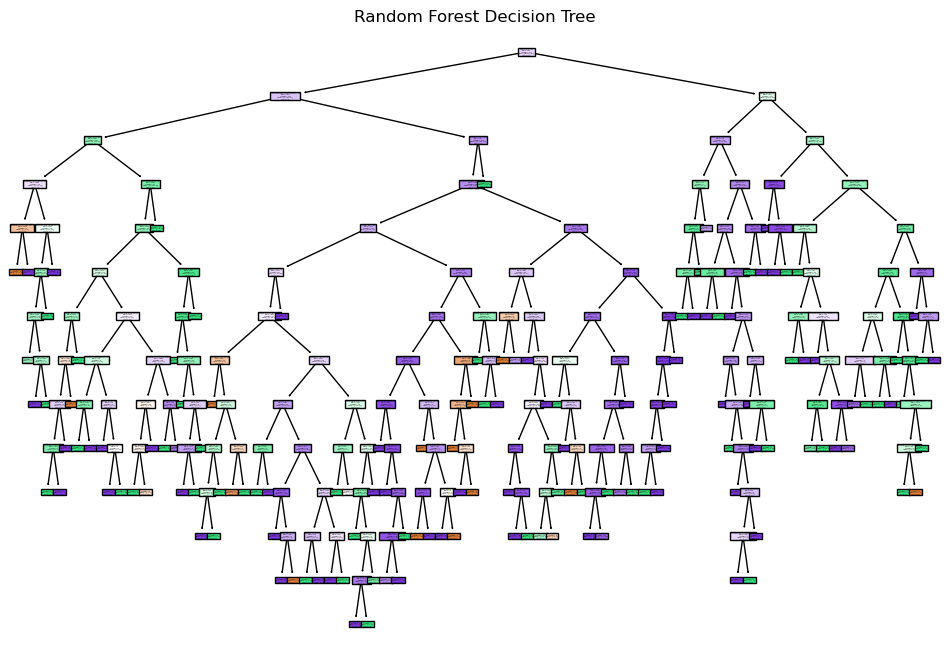

In [33]:
target_tree = model.estimators_[0]

plt.figure(figsize=(12, 8))
tree.plot_tree(target_tree, feature_names=X_train.columns, class_names=True, filled=True)
plt.title(f"Random Forest Decision Tree")
plt.show()

In [34]:

# get feature_importances
feature_importances = model.feature_importances_

# create a DataFrame contains feature_importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# sort by feature_importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# get top ten features
top_ten_features = feature_importance_df.head(10)

print(top_ten_features)

                            Feature  Importance
27                 Class Duration_0    0.067610
0                        Gender_Boy    0.051272
1                       Gender_Girl    0.047614
28               Class Duration_1-3    0.042325
29               Class Duration_3-6    0.040616
19          Financial Condition_Mid    0.037774
12  Institution Type_Non Government    0.035037
20         Financial Condition_Poor    0.032769
16                     Location_Yes    0.032354
23               Internet Type_Wifi    0.031823


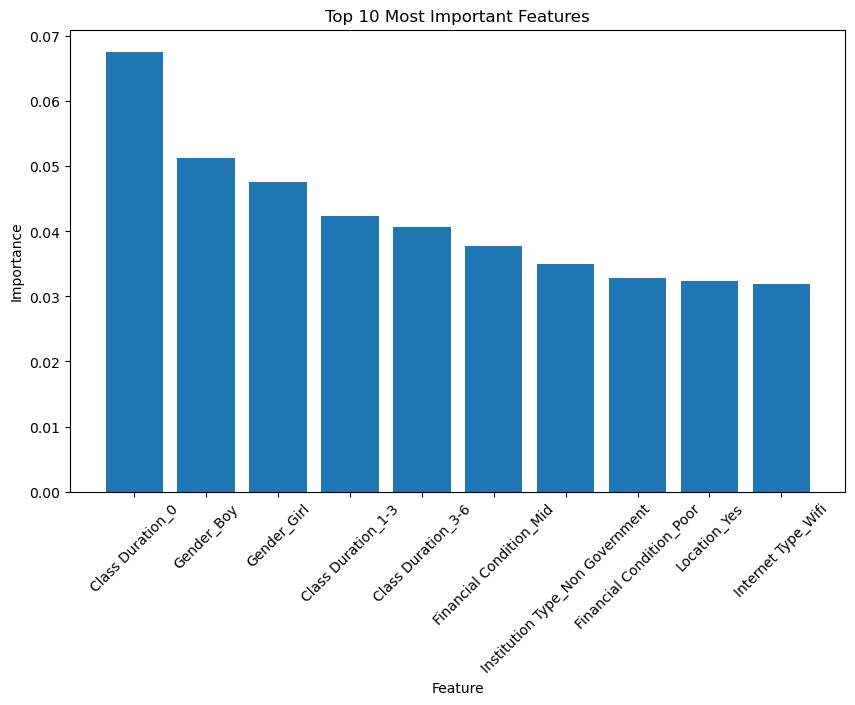

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten_features['Feature'], top_ten_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45)
plt.show()

### Step 2
將主要特徵 'Class Duration','Gender','Financial Condition' 列出，觀察不同項目間的關聯  
ist the main features 'Class Duration,' 'Gender,' and 'Financial Condition' to observe the relationships between different items.

In [36]:
subset_data: pd.DataFrame = df[['Class Duration','Gender','Financial Condition',target_feature]]
subset_data.head(3)

,Class Duration,Gender,Financial Condition,Adaptivity Level
0,3-6,Boy,Mid,Moderate
1,1-3,Girl,Mid,Moderate
2,1-3,Girl,Mid,Moderate


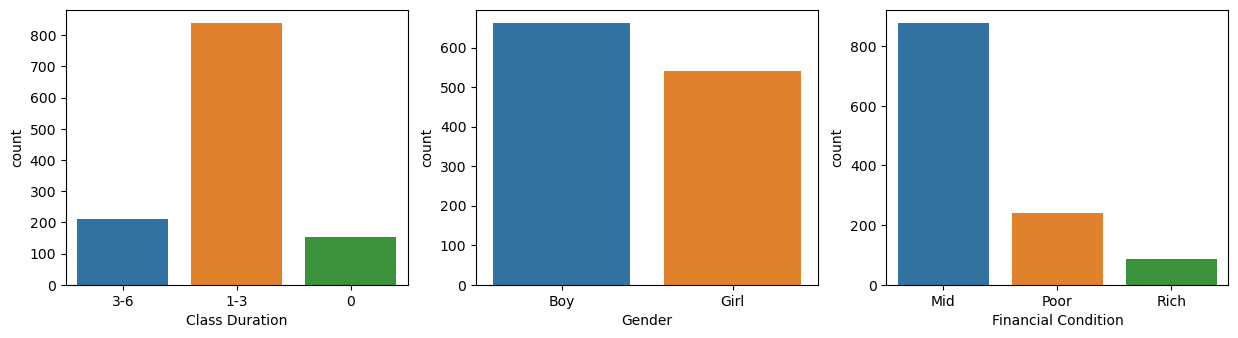

In [37]:
count = 1
plt.figure(figsize = (15,25))

for feature in subset_data :
    plt.subplot(6,3,count)
    sns.countplot(x = feature , data = subset_data)
    count +=1
    if count > 3 : break

In [38]:
# compare between ['Class Duration', 'Gender', 'Financial Condition']
compare_list: list = list(subset_data.columns)
compare_list.remove(target_feature)

print('The Chi-Squared Test of Independence:', end='\n\n')

for compare_item in compare_list:
    print(f'compare between {compare_item} and {target_feature}:')
    chi2, p, _, _ = chi2_contingency(pd.crosstab(subset_data[compare_item], subset_data[target_feature]))

    print("Chi-squared value:", chi2)
    print("p-value:", p)
    
    print()


The Chi-Squared Test of Independence:

compare between Class Duration and Adaptivity Level:
Chi-squared value: 225.91788519948977
p-value: 9.983962891861e-48

compare between Gender and Adaptivity Level:
Chi-squared value: 13.451358056255899
p-value: 0.0011997056689743298

compare between Financial Condition and Adaptivity Level:
Chi-squared value: 236.86479235811265
p-value: 4.391228197442381e-50



#### => There are strong relation between Class Duration and Adaptivity Level, Financial Condition and Adaptivity Level.

### step 3
將資料輸出為表格  
Output the data as a table.  

In [39]:
subset_data = subset_data.drop(['Gender'], axis=1)

In [40]:

plot_dict: list = [
    {
    'type':'high',
    'color_mapping': {'Low': 'lightgrey', 'Moderate': 'lightgrey', 'High': 'dodgerblue'},
    'plot_range':[0,100],
    'plot_size':3
    },
    {
    'type':'moderate',
    'color_mapping': {'Low': 'lightgrey', 'Moderate': 'dodgerblue', 'High': 'lightgrey'},
    'plot_range':[0,600],
    'plot_size':3
    },
    {
    'type':'low',
    'color_mapping': {'Low': 'dodgerblue', 'Moderate': 'lightgrey', 'High': 'lightgrey'},
    'plot_range':[0,400],
    'plot_size':3
    },
    ]

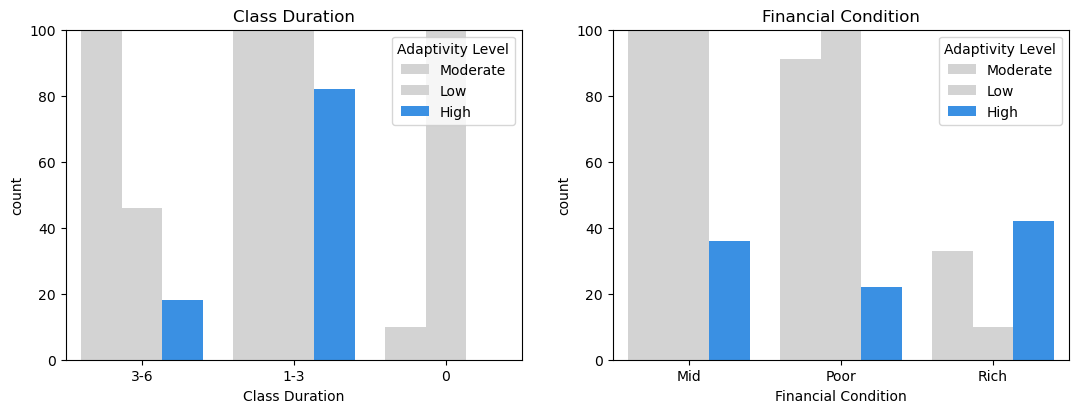

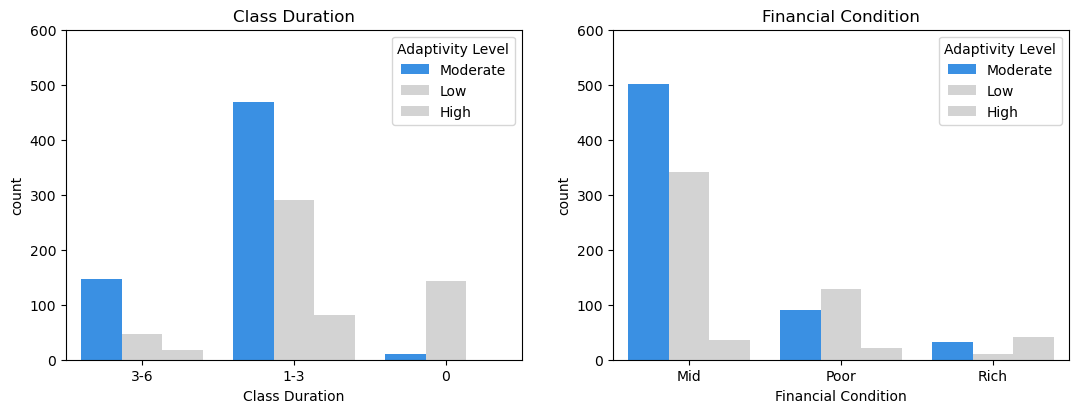

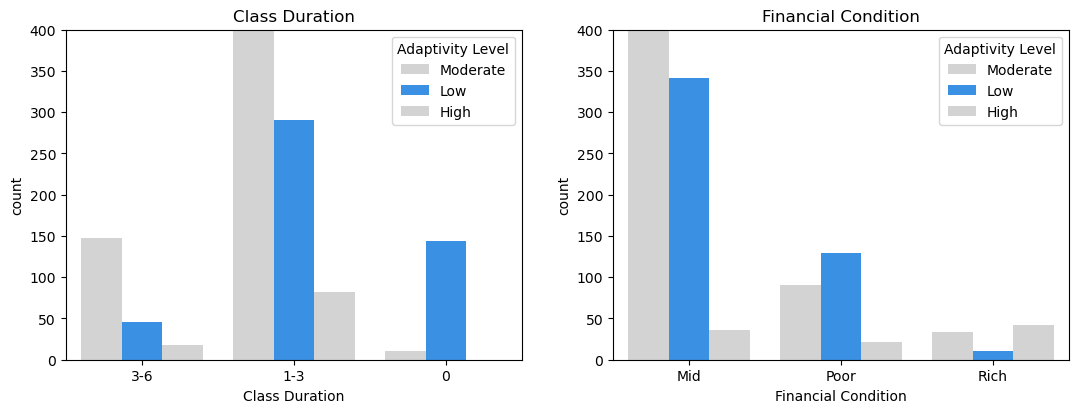

In [41]:
for item in plot_dict:
    count = 1
    plt.figure(figsize = (20,30))
    loop_break: bool = False
    
    for feature in subset_data:
        plt.subplot(6,item['plot_size'],count)
        sns.countplot(x = feature , hue = 'Adaptivity Level', data = subset_data, palette = item['color_mapping'])
        
        plt.ylim(item['plot_range'])
        plt.title(feature)
        
        count += 1
        
        if loop_break: break
        loop_break = True

### Conclusion
1. 可以發現 Adaptivity Level 與 Financial Condition 為正相關，家裡越有錢的學生普遍會有更好的表現。  
We can see that Adaptivity Level and Financial Condition are related in a positive way.   
Students who have more money tend to do better.

2. 可以發現不花時間上課的學生不存在好表現的案例。而花費超過3小時上課的學生表現反而沒有比1~3小時的學生好。  
You can see that students who don't spend time in class don't do well.   
And students who spend more than 3 hours in class actually don't perform better than students who spend 1 to 3 hours in class.  
 